## basic import setup for a bioscrape model

In [5]:
#Using Bioscrape: Basic Imports

#A Model is a CRN with some bells and whistles
from bioscrape.types import Model

#py_simulate_model is a helper function that takes care of may details for you
from bioscrape.simulator import py_simulate_model

#For arrays and plotting
import numpy as np
import pylab as plt

I'm going to try to do a model of population capping, if that won't work, i'll just try doing cells that respond to an external source of ahl signal

## Species

In [6]:
#Species: A list of all the species
species = ["S", "T", "T:S", "G", "TSG", "P", "TSG:P", "M", "R", "M:R", "GFP"]

In [37]:
#Params
params = [("kahlbind", 100), ("kahlunb", 1), 
          ("ktfbind", 50), ("ktfunb", 10), 
          ("kpolbind", 50), ("kpolunb", 2), 
          ("kribbind", 40), ("kribunb", 10),
          ("ktx", 2), ("ktl", 5), ("delta", .5),
         ("kahl", 0.01), ("ahldeg", 0.25)]

In [38]:
#Reactions: A list of reactions [rxn1, rxn2...]. Each reaction is a tuple ([Input Species], [Output Species], "propensity_type", {propensity_parameters})

#make and degrade signal
rxnS = ([], ["S"], "massaction", {"k":"kahl"})
rxnDegS = (["S"], [], "massaction", {"k":"ahldeg"})

#ahl binds and unbinds transcription factor
rxnAHL = (["T", "S"], ["T:S"], "massaction", {"k":"kahlbind"})
rxnAHL0 = (["T:S"], ["T", "S"], "massaction", {"k":"kahlunb"})

#active transcription factor binds dna
rxnDNA = (["T:S", "G"], ["TSG"], "massaction", {"k":"ktfbind"})
rxnDNA0 = (["TSG"], ["T:S", "G"], "massaction", {"k":"ktfunb"})

#DNA transcription factor complex binds polymerase
rxnPol = (["TSG", "P"], ["TSG:P"], "massaction", {"k":"kpolbind"})
rxnPol0 = (["TSG:P"], ["TSG", "P"], "massaction", {"k":"kpolunb"})

#transcription
rxnTx = (["TSG:P"], ["TSG", "P", "M"], "massaction", {"k":"ktx"})
rxnDegM = (["M"], [], "massaction", {"k":"delta"})

#ribosome binds mrna
rxnRib = (["M", "R"], ["M:R"], "massaction", {"k":"kribbind"})
rxnRib0 = (["M:R"], ["M", "R"], "massaction", {"k":"kribunb"})

#Translation
rxntl = (["M:R"], ["M", "R", "GFP"], "massaction", {"k":"ktl"})
rxnDegGFP = (["GFP"], [], "massaction", {"k":"delta"})



reactions = [rxnS, rxnDegS, rxnAHL, rxnAHL0, rxnDNA, rxnDNA0, rxnPol, rxnPol0,
             rxnTx, rxnRib, rxnRib0, rxntl, rxnDegS, rxnDegGFP, rxnDegM]

In [39]:
#An initial condition for each species (uninitialized species default to 0)

# species = ["S", "T", "T:S", "G", "TSG", "TSG:P", "M", "R", "M:R", "GFP"]

x0 = {
    "T":10,
    "G":1,
    "P":25,
    "R":100,
}

In [40]:
#Bioscrape is Object Oritened: Models, Propensities, Simulators, etc. are all Objects

#Instantiate the Model [The only object must of us will care about]
M = Model(species = species, reactions = reactions, parameters = params, initial_condition_dict = x0)


#Simulate the Model
timepoints = np.linspace(0, 500, 50000)

Results = py_simulate_model(timepoints, Model = M) #py_simulate_model takes care of all other objects for you

C:\Users\geeze\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The following species are uninitialized and their value has been defaulted to 0: S, T:S, TSG, TSG:P, M, M:R, GFP, 
  after removing the cwd from sys.path.


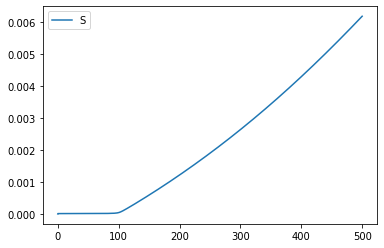

In [43]:
#Bioscrape returns a Pandas Dataframe by default, so plotting is easy!

plt.figure()

plt.plot(timepoints, Results["S"], label = "S")
plt.plot(timepoints, Results["T"], label = "T")
plt.plot(timepoints, Results["GFP"], label = "GFP")
plt.legend()


In [44]:
#Switching to Stochastic Simulation is easy!
Results_stoch = py_simulate_model(timepoints, Model = M, stochastic = True) #py_simulate_model takes care of all other objects for you

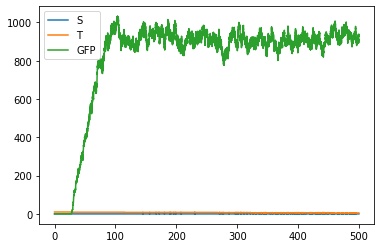

In [45]:
plt.figure()

plt.plot(timepoints, Results_stoch["S"], label = "S")
plt.plot(timepoints, Results_stoch["T"], label = "T")
plt.plot(timepoints, Results_stoch["GFP"], label = "GFP")
plt.legend()